In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import chardet
import plotly_express as px


""" MOBILITY AND TRANSPORT"""
dataset_path_mat = 'C:/Users/teun/OneDrive/Documenten/Transport_Infrastructure_Logistics/jaar 2/TIL_Programming/data_assignment/Mobiliteitstrend__per_rit_en_motief_02102024_122208.csv'
with open(dataset_path_mat, 'rb') as rawdata:

    result = chardet.detect(rawdata.read(100000))

dataset_path_wfh1 = 'C:/Users/teun/OneDrive/Documenten/Transport_Infrastructure_Logistics/jaar 2/TIL_Programming/data_assignment/Werkzame_beroepsbevolking__thuiswerken_04102024_193141.csv'
dataset_path_wfh2 = 'C:/Users/teun/OneDrive/Documenten/Transport_Infrastructure_Logistics/jaar 2/TIL_Programming/data_assignment/Werkzame_beroepsbevolking__thuiswerken_07102024_101921.csv'
df_mat_path = 'C:/Users/teun/OneDrive/Documenten/Transport_Infrastructure_Logistics/jaar 2/TIL_Programming/data_assignment/Mobiliteitstrend__per_rit_en_motief_02102024_122208.csv'

df_wfh1 = pd.read_csv(dataset_path_wfh1, delimiter=";", encoding="UTF-8-SIG")
df_wfh2 = pd.read_csv(dataset_path_wfh2, delimiter=";", encoding="UTF-8-SIG")
df_mat = pd.read_csv(df_mat_path, delimiter=";", encoding="UTF-8-SIG")
    
result

{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}

In [3]:
df_wfh1 = pd.read_csv(dataset_path_wfh1,delimiter=";",encoding="UTF-8-SIG")
df_wfh2 = pd.read_csv(dataset_path_wfh2,delimiter=";",encoding="UTF-8-SIG")
df_mat = pd.read_csv('Data/Mobiliteitstrend__per_rit_en_motief_02102024_122208.csv',delimiter=";",encoding="UTF-8-SIG")

df_wfh2.rename(columns={'Positie in de werkkring': 'Positie werkkring'}, inplace=True)
df_wfh2.rename(columns={'Thuiswerken': 'Thuiswerker'}, inplace=True)

columns = list(df_wfh2.columns)
columns.insert(1, columns.pop(columns.index('Thuiswerker')))
df_wfh2 = df_wfh2[columns]  

df_merged = pd.concat([df_wfh1,df_wfh2])

thuiswerker_mapping = {
    'Thuiswerker die gewoonlijk thuis werkt': 'Meestal thuiswerken',
    'Thuiswerker, incidenteel op vaste dagen': 'Soms thuiswerken',
    'Thuiswerker, incidenteel geen vaste dag': 'Soms thuiswerken',
    'Geen thuiswerker': 'Niet thuiswerken'
}

df_merged['Thuiswerker'] = df_merged['Thuiswerker'].replace(thuiswerker_mapping)

df_filtered = df_merged[
    (df_merged['Positie werkkring'] == 'Totaal') &
    (df_merged['Persoonskenmerken'] == 'Totaal personen') &
    (~df_merged['Thuiswerker'].isin(["Thuiswerker","Totaal","Meestal of soms thuiswerken","Thuiswerker die incidenteel thuis werkt"]))
]


df_filtered1 = df_wfh1[(df_wfh1['Thuiswerker'] == "Thuiswerker")&(df_wfh1['Positie werkkring'] == 'Totaal')&(df_wfh1['Persoonskenmerken'] == 'Totaal personen')]
df_filtered2 = df_wfh2[(df_wfh2['Thuiswerker'] == "Meestal of soms thuiswerken")&(df_wfh2['Positie werkkring'] == 'Totaal')&(df_wfh2['Persoonskenmerken'] == 'Totaal personen')]

df_wfh_line = pd.concat([df_filtered1,df_filtered2])


px.line(df_wfh_line,
        x="Perioden",
        y="Werkzame beroepsbevolking (x 1 000)",
        title = "Number of remote working people",
        labels={"Perioden": "Periods", "Werkzame beroepsbevolking (x 1 000)": "Number of remote working people (x1 000)"})

In [8]:
df_mod = pd.read_csv(dataset_path_mat,delimiter=';',encoding='UTF-8-SIG')
df_mod

,Geslacht,Leeftijd,Vervoerwijzen,Reismotieven,Marges,Perioden,Ritten per persoon per dag (gemiddeld) (aantal),Afgelegde afstand per rit (gemiddeld) (km),Reisduur per rit (Minuten)
0,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,1999*,3.41,10.96,23.72
1,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,2003*,3.30,11.04,23.65
2,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,2007*,3.20,11.07,23.88
3,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,2011*,3.09,11.21,23.76
4,Totaal mannen en vrouwen,Totaal,Totaal,Totaal,Waarde,2015*,3.03,11.36,24.14
...,...,...,...,...,...,...,...,...,...
1435,Totaal mannen en vrouwen,60 tot 65 jaar,Overige vervoerwijze,Overige reismotieven,Waarde,2019*,.,.,.
1436,Totaal mannen en vrouwen,60 tot 65 jaar,Overige vervoerwijze,Overige reismotieven,Waarde,2020*,.,.,.
1437,Totaal mannen en vrouwen,60 tot 65 jaar,Overige vervoerwijze,Overige reismotieven,Waarde,2021*,.,.,.
1438,Totaal mannen en vrouwen,60 tot 65 jaar,Overige vervoerwijze,Overige reismotieven,Waarde,2022*,.,.,.


In [9]:
df_mod = df_mod.sort_values(['Ritten per persoon per dag (gemiddeld) (aantal)'], ascending=True)
df_mod = df_mod.sort_values(['Perioden'], ascending=True)
df_mod_total = df_mod[
    (df_mod['Geslacht'] == "Totaal mannen en vrouwen") &
    (df_mod["Leeftijd"] == "Totaal") &
    (df_mod["Vervoerwijzen"] != "Totaal")&
    (df_mod["Reismotieven"] == "Totaal")]

df_mod_total['Reismotieven'] = df_mod_total['Vervoerwijzen'].replace({
    "Auto (bestuurder)": "Car (driver)",
    "Overige vervoerwijze": "Other travel mode",
    "Auto (passagier)": "Car (passenger)",
    "Trein": "Train",
    "Lopen": "Walking"})

fig = px.bar(df_mod_total,
        x="Perioden",
        y="Ritten per persoon per dag (gemiddeld) (aantal)",
        color="Reismotieven",
        title= "Travel motives over time",
        labels= {"Perioden": "Periods", "Ritten per persoon per dag (gemiddeld) (aantal)": "Number of trips per day (average)", "Reismotieven": "Travel motives"})
fig.update_yaxes(type='linear')
fig.show()

C:\Users\teun\AppData\Local\Temp\ipykernel_11676\2896205784.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
df_pct = df_mod_total.copy()
df_pct['Ritten per persoon per dag (gemiddeld) (aantal)'] = (
    df_pct['Ritten per persoon per dag (gemiddeld) (aantal)']
    .str.replace(',', '.')
    .astype(float)  
)

df_pct['percentage'] = df_pct.groupby('Perioden')['Ritten per persoon per dag (gemiddeld) (aantal)'].transform(
    lambda x: (x / x.sum() * 100))


fig = px.bar(df_pct,
        x="Perioden",
        y="percentage",
        color="Vervoerwijzen",
        title="Transportation modes over time",
        labels={"Perioden": "Periods", 
                "percentage": "Percentage of trips (%)", 
                "Vervoerwijzen": "Transportation modes"},
        text_auto='.1f')

fig.update_yaxes(type='linear')
fig.show()

In [17]:
# Redefine pivot table
df_filtered_agg_pivot = df_filtered_agg.pivot(index='Perioden', columns='Thuiswerker', values='Percentage')

# Fill NaN values with 0 to allow for addition without errors
df_filtered_agg_pivot = df_filtered_agg_pivot.fillna(0)

# Calculate Home_Work_Percentage directly from pivoted values
df_filtered_agg_pivot['Home_Work_Percentage'] = df_filtered_agg_pivot.get('Soms thuiswerken', 0) + df_filtered_agg_pivot.get('Meestal thuiswerken', 0)

# Reset index to access 'Perioden' for merging
df_filtered_agg_pivot = df_filtered_agg_pivot.reset_index()

# Ensure Perioden columns are strings for consistency
df_filtered_agg_pivot['Perioden'] = df_filtered_agg_pivot['Perioden'].astype(str)
car_usage_data['Perioden'] = car_usage_data['Perioden'].astype(str)

# Merge the data on 'Perioden' column
merged_data_actual = pd.merge(
    df_filtered_agg_pivot[['Perioden', 'Home_Work_Percentage']], 
    car_usage_data, 
    on='Perioden', 
    how='inner'
)

Jaar 2015: Thuiswerken Percentage = 35.91320072332731%, Autogebruik Percentage = 31.35313531353135%
Jaar 2019: Thuiswerken Percentage = 39.086237712243076%, Autogebruik Percentage = 31.75675675675676%
Jaar 2020: Thuiswerken Percentage = 41.034521282538265%, Autogebruik Percentage = 31.85483870967742%
Jaar 2021: Thuiswerken Percentage = 53.98163155051324%, Autogebruik Percentage = 30.798479087452474%
Jaar 2022: Thuiswerken Percentage = 53.08965228320067%, Autogebruik Percentage = 30.175438596491233%
Jaar 2023: Thuiswerken Percentage = 51.951520131470836%, Autogebruik Percentage = 30.61224489795919%


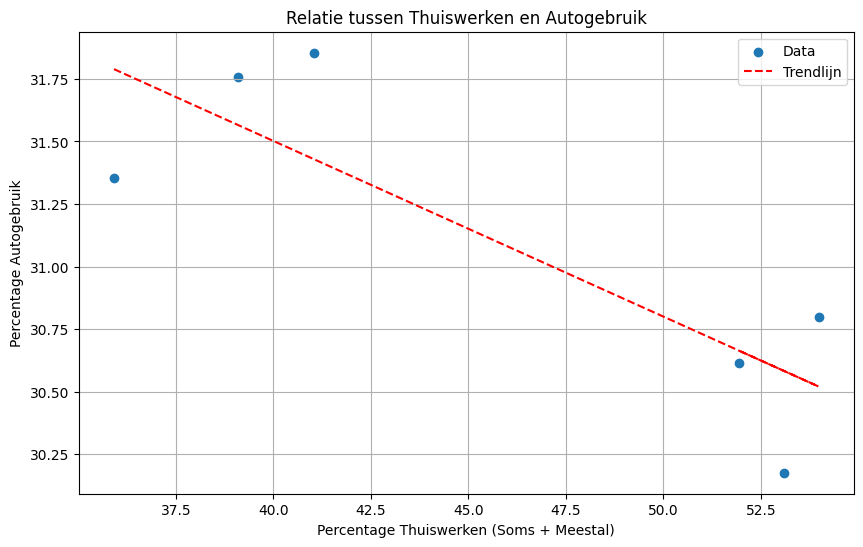

In [18]:
# Maak een pivot tabel en voeg kolommen samen
df_pivot = df_filtered_agg.pivot(index='Perioden', columns='Thuiswerker', values='Percentage').fillna(0)
df_pivot['Thuiswerk_Percentage'] = df_pivot.get('Soms thuiswerken', 0) + df_pivot.get('Meestal thuiswerken', 0)

# Zet 'Perioden' als string voor consistente bewerkingen en reset de index
df_pivot = df_pivot.reset_index()
df_pivot['Perioden'] = df_pivot['Perioden'].astype(str)
car_usage_data['Perioden'] = car_usage_data['Perioden'].astype(str)

# Merge de datasets op basis van 'Perioden'
merged_data = pd.merge(
    df_pivot[['Perioden', 'Thuiswerk_Percentage']], 
    car_usage_data, 
    on='Perioden', 
    how='inner'
)

# Print de periodes met bijbehorende percentages
for index, row in merged_data.iterrows():
    print(f"Jaar {row['Perioden']}: Thuiswerken Percentage = {row['Thuiswerk_Percentage']}%, Autogebruik Percentage = {row['percentage']}%")

# Maak een scatter plot met trendlijn
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Thuiswerk_Percentage'], merged_data['percentage'], label='Data')
plt.xlabel('Percentage Thuiswerken (Soms + Meestal)')
plt.ylabel('Percentage Autogebruik')
plt.title('Relatie tussen Thuiswerken en Autogebruik')

# Voeg trendlijn toe
z = np.polyfit(merged_data['Thuiswerk_Percentage'], merged_data['percentage'], 1)
p = np.poly1d(z)
plt.plot(merged_data['Thuiswerk_Percentage'], p(merged_data['Thuiswerk_Percentage']), "r--", label='Trendlijn')

plt.grid(True)
plt.legend()
plt.show()